## Importing the library

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

## Loading the data

In [39]:
gstock_data=pd.read_csv('handled_NaN.csv'); gstock_data

,Date,Open,High,Low,Close,Headlines,Sentiment
0,2022-05-06,34569.10,34797.95,34353.20,34591.20,NaN,[9.98220980e-01 1.76668126e-03 1.23147655e-05]
1,2022-05-05,35705.35,35934.85,35133.80,35232.85,‘Rate cycle U-turn: RBI may go for more’.,[9.9999130e-01 1.1432373e-06 7.4827230e-06]
2,2022-05-04,36266.15,36309.30,35127.85,35264.55,RBI raises CRR by 50 bps to 4.5% from May 21. ...,[9.9954671e-01 4.1552441e-04 3.7765163e-05]
3,2022-05-02,35627.60,36235.25,35618.20,36163.75,Bank holidays in May 2022: Here is the list of...,[9.9998772e-01 6.8683225e-06 5.3801709e-06]
4,2022-04-29,36474.05,36718.80,35978.95,36088.15,"To plug support package loopholes, Nabard plan...",[9.9999213e-01 5.6305475e-07 7.2760436e-06]
...,...,...,...,...,...,...,...
3299,2009-01-07,5416.35,5440.55,4954.00,4984.50,NaN,[0.96629931 0.00117951 0.03252119]
3300,2009-01-06,5333.50,5448.80,5276.40,5395.30,NaN,[0.96629928 0.00117951 0.03252123]
3301,2009-01-05,5273.45,5371.10,5273.45,5359.40,NaN,[0.96629944 0.0011795 0.03252107]
3302,2009-01-02,5154.20,5258.65,5103.60,5195.10,NaN,[0.96629954 0.0011795 0.03252098]


In [40]:

S=gstock_data['Sentiment']
for  j in range(len(S)):
    s=S[j].replace('[','').replace(',','').replace(']','').split()
    for i in range(len(s)):
        s[i]=float(s[i])
    S[j]=s
gstock_data['Sentiment']=S

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [41]:

gstock_data['Date'] = pd.to_datetime(gstock_data['Date'], format='%Y-%m-%d')
gstock_data = gstock_data.sort_values(by='Date',ascending=True)
gstock_data['Date'] = gstock_data['Date'].dt.strftime('%d-%m-%Y') 
gstock_data.set_index('Date',drop=True,inplace=True) 
gstock_data.head(15)

,Open,High,Low,Close,Headlines,Sentiment
Date,,,,,,
01-01-2009,5019.20,5135.15,5019.20,5116.5,NaN,"[0.96629958, 0.0011795, 0.03252094]"
02-01-2009,5154.20,5258.65,5103.60,5195.1,NaN,"[0.96629954, 0.0011795, 0.03252098]"
05-01-2009,5273.45,5371.10,5273.45,5359.4,NaN,"[0.96629944, 0.0011795, 0.03252107]"
06-01-2009,5333.50,5448.80,5276.40,5395.3,NaN,"[0.96629928, 0.00117951, 0.03252123]"
07-01-2009,5416.35,5440.55,4954.00,4984.5,NaN,"[0.96629931, 0.00117951, 0.03252119]"
09-01-2009,4891.80,5056.95,4840.00,4906.7,NaN,"[0.96629961, 0.0011795, 0.03252091]"
12-01-2009,4862.00,4881.50,4612.75,4698.0,NaN,"[0.96629986, 0.00117949, 0.03252066]"
13-01-2009,4700.25,4764.15,4605.65,4661.7,NaN,"[0.96629997, 0.00117948, 0.03252056]"
14-01-2009,4684.30,4819.50,4682.10,4751.1,NaN,"[0.96629921, 0.00117951, 0.0325213]"


In [42]:
data = gstock_data.drop(['Open', 'High', 'Low', 'Headlines', 'Sentiment'], axis = 1); data

,Close
Date,
01-01-2009,5116.50
02-01-2009,5195.10
05-01-2009,5359.40
06-01-2009,5395.30
07-01-2009,4984.50
...,...
29-04-2022,36088.15
02-05-2022,36163.75
04-05-2022,35264.55


In [43]:
date = list(gstock_data.index)

In [44]:
news = gstock_data['Sentiment'].to_list()

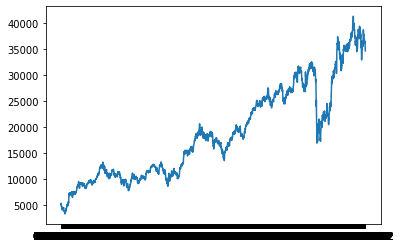

In [9]:
plt.plot(data) ##visualising the data

## Data loading and train-test split

In [45]:
def load_data(stock, look_back):
    data_raw = stock # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data);
    test_set_size = int(np.round(0.1*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    new_sent_train = news[9:train_set_size+9]
    new_sent_train = np.array(new_sent_train)
    date_train = date[9:train_set_size+9]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    new_sent_test = news[train_set_size+9:-2]
    new_sent_test = np.array(new_sent_test)
    date_test = date[train_set_size+9:-2]

    return [x_train, y_train, new_sent_train, date_train, x_test, y_test, new_sent_test, date_test]
    

In [46]:
sc = MinMaxScaler()
data = sc.fit_transform(data)
x_train, y_train, new_sent_train, date_train, x_test, y_test, new_sent_test, date_test = load_data(data, 11)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('new_sent_train = ', new_sent_train.shape)
print('date_train length = ', len(date_train))
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)
print('new_sent_test = ', new_sent_test.shape)
print('date_test length = ', len(date_test))

x_train.shape =  (2964, 10, 1)
y_train.shape =  (2964, 1)
new_sent_train =  (2964, 3)
date_train length =  2964
x_test.shape =  (329, 10, 1)
y_test.shape =  (329, 1)
new_sent_test =  (329, 3)
date_test length =  329


In [47]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)
new_sent_train = torch.from_numpy(new_sent_train).type(torch.Tensor)
new_sent_test = torch.from_numpy(new_sent_test).type(torch.Tensor)

## Building the model

In [48]:

# Build model
#####################
input_dim = 1
hidden_dim = 10
num_layers = 4 
output_dim = 1
sent_dim = 3

# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, sent_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim+sent_dim, output_dim)

    def forward(self, x, d):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        ##out = self.fc(out[:, -1, :]) 
        out = out[:, -1, :]
        
        x1 = torch.cat((out, d), dim = 1)
        output = self.fc(x1)
        # out.size() --> 100, 10
        return output
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, sent_dim=sent_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 10, num_layers=4, batch_first=True)
  (fc): Linear(in_features=13, out_features=1, bias=True)
)
18
torch.Size([40, 1])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([40, 10])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([40, 10])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([40, 10])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([1, 13])
torch.Size([1])


In [49]:
sum(i.numel() for i in model.parameters())  ##no. of parameters

3174

## Training

In [50]:
# Train model
#####################
num_epochs = 850
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =10  


for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train, new_sent_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.038513604551553726
Epoch  20 MSE:  0.037306495010852814
Epoch  30 MSE:  0.03479263558983803
Epoch  40 MSE:  0.01017274521291256
Epoch  50 MSE:  0.00860530324280262
Epoch  60 MSE:  0.004531468264758587
Epoch  70 MSE:  0.0012902438174933195
Epoch  80 MSE:  0.0005472464836202562
Epoch  90 MSE:  0.00043442813330329955
Epoch  100 MSE:  0.0003758457023650408
Epoch  110 MSE:  0.00033881221315823495
Epoch  120 MSE:  0.00033035044907592237
Epoch  130 MSE:  0.00037067526136524975
Epoch  140 MSE:  0.00032539316453039646
Epoch  150 MSE:  0.00030994127155281603
Epoch  160 MSE:  0.0003027371712960303
Epoch  170 MSE:  0.0003053366090171039
Epoch  180 MSE:  0.0004100980586372316
Epoch  190 MSE:  0.0003191275172866881
Epoch  200 MSE:  0.00030366418650373816
Epoch  210 MSE:  0.0002824041584972292
Epoch  220 MSE:  0.0002803689567372203
Epoch  230 MSE:  0.0002731819113250822
Epoch  240 MSE:  0.0002928163157775998
Epoch  250 MSE:  0.0003993271093349904
Epoch  260 MSE:  0.00027251060237176

## Testing

In [51]:
 # make predictions
y_test_pred = model(x_test, new_sent_test)
y_train_pred = model(x_train, new_sent_train)


# invert predictions
y_train_pred = sc.inverse_transform(y_train_pred.data.numpy())
y_train = sc.inverse_transform(y_train.data.numpy())
y_test_pred = sc.inverse_transform(y_test_pred.data.numpy())
y_test = sc.inverse_transform(y_test.data.numpy())

# calculate root mean squared error
trainScore = sqrt(mse(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mse(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 353.86 RMSE
Test Score: 992.68 RMSE


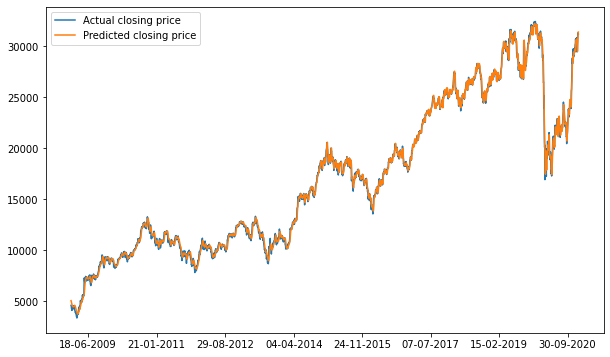

In [59]:
plt.figure(figsize=(10,6))
plt.plot(y_train, label = 'Actual closing price')
plt.plot(y_train_pred, label = 'Predicted closing price')
index = np.arange(100,2928,400)

plt.xticks(index, labels = date_train[100:2928:400])
plt.legend()
plt.show()

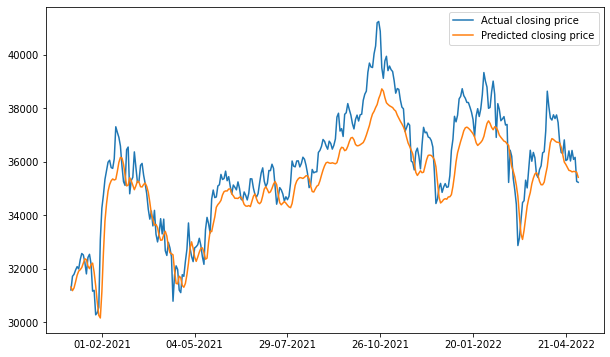

In [58]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label = 'Actual closing price')
plt.plot(y_test_pred, label = 'Predicted closing price')
index = np.arange(20,330,60)
plt.xticks(index, labels = date_test[20:330:60])
plt.legend()
plt.show()
